# 0. My PCA

In [ ]:
import numpy as np
import numpy.linalg as lin
from sklearn.preprocessing import StandardScaler


class mypca(object):
    '''
    k : component 수 주성분 개수
    n : 원래 차원 열
    components : 고유벡터 저장소 shape (k,n)
    explain_values : 고유값 shape (k,)
    '''
    
    k = None
    components = None
    explain_values= None
    
    def __init__(self, k=None, X_train=None):
        '''
        k의 값이 initial에 없으면 None으로 유지
        '''
        if k is not None :
            self.k = k       
        if X_train is not None:
            self.fit(X_train)
            
    def fit(self,X_train=None):
        if X_train is None:
            print('Input is nothing!')
            return
        if self.k is None:
            self.k = min(X_train.shape[0],X_train.shape[1])
            
        k = self.k
        components = [0]*k
        import pandas as pd
        X_train = pd.DataFrame(X_train)
        cov_mat = X_train.cov()
        for i in range(k):
            components[i] = lin.eig(cov_mat)[1][:,i]
        explain_values = lin.eig(cov_mat)[0]
        self.components = np.asarray(components)
        
        #############################################
        # TO DO                                     #
        # 인풋 데이터의 공분산행렬을 이용해         #
        # components와 explain_values 완성          # 
        #############################################
        
        
        
        #############################################
        # END CODE                                  #
        #############################################
        
        return
    
    def transform(self,X=None):
        if X is None:
            print('Input is nothing!')
            return
        
        result = None
        '''
        N : X의 행 수
        result의 shape : (N, k)
        '''
        k = self.k
        components = self.components
        result_t = [0]*k

        for i in range(k):
            result_t[i] = components[i].dot(X.T)
        result_t = np.array(result_t)
        result = result_t.T
        #############################################
        # TO DO                                     #
        # components를 이용해 변환결과인            #
        # result 계산                               #
        #############################################
        
        
        
        #############################################
        # END CODE                                  #
        #############################################       
        return result
    
    def fit_transform(self,X=None):
        if X is None:
            print('Input is nothing!')
            return
        self.fit(X)
        return self.transform(X)

# Q1. PCA를 직접 구현한 myPCA 

mypca.py 내부의 빈칸을 수정

In [4]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import datasets
import matplotlib.pyplot as plt

## DATA LOAD

In [2]:
iris = datasets.load_iris()
labels = np.array(iris.target).reshape(150,)
data = pd.DataFrame(iris.data,columns=['Sepal length','Sepal width','Petal length','Petal width'])

In [3]:
scaler = StandardScaler()
x = scaler.fit_transform(data)

In [11]:
type(data)

pandas.core.frame.DataFrame

### sklearn pca

In [51]:
real_pca = PCA(2)
real_pca_features = real_pca.fit_transform(x)
real_components = real_pca.components_
type(real_components)

numpy.ndarray

### 구현한 pca

In [55]:
from mypca import mypca

%load_ext autoreload
%autoreload 2

my_pca = mypca(k=2)
my_pca_features = my_pca.fit_transform(x)
my_components = my_pca.components

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 결과 비교

고유벡터는 반대 방향일 수 있어서 abs의 차이로 판단

components의 결과와 data transform의 결과의 차이가 1e-6보다 작으면 정답

In [56]:
(abs(real_components)- abs(my_components)).sum() < 1e-6

True

In [25]:
real_pca_features.shape

(150, 2)

In [26]:
my_pca_features.shape

(150, 2)

In [41]:
(abs(real_pca_features)-abs(my_pca_features)).sum() < 1e-6

True

# Q2. 단어 임베딩 벡터 시각화

In [22]:
import os
os.chdir("C:/Users/Kim Yuum/Desktop/투빅스/4주차/PCA/")
df = pd.read_csv("./word_embedding.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,the,-0.038194,-0.244870,0.728120,-0.399610,0.083172,0.043953,-0.39141,0.334400,-0.57545,...,0.016215,-0.017099,-0.38984,0.87424,-0.72569,-0.51058,-0.520280,-0.145900,0.82780,0.27062
1,of,-0.152900,-0.242790,0.898370,0.169960,0.535160,0.487840,-0.58826,-0.179820,-1.35810,...,0.187120,-0.018488,-0.26757,0.72700,-0.59363,-0.34839,-0.560940,-0.591000,1.00390,0.20664
2,to,-0.189700,0.050024,0.190840,-0.049184,-0.089737,0.210060,-0.54952,0.098377,-0.20135,...,-0.131340,0.058617,-0.31869,-0.61419,-0.62393,-0.41548,-0.038175,-0.398040,0.47647,-0.15983
3,and,-0.071953,0.231270,0.023731,-0.506380,0.339230,0.195900,-0.32943,0.183640,-0.18057,...,0.014487,-0.625900,-0.32367,0.41862,-1.08070,0.46742,-0.499310,-0.718950,0.86894,0.19539
4,in,0.085703,-0.222010,0.165690,0.133730,0.382390,0.354010,0.01287,0.224610,-0.43817,...,0.402150,-0.127460,-0.20228,0.87368,-0.54500,0.79205,-0.206950,-0.074273,0.75808,-0.34243


In [23]:
word = df["0"]
del df["0"]
df.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-0.038194,-0.244870,0.728120,-0.399610,0.083172,0.043953,-0.39141,0.334400,-0.57545,0.087459,...,0.016215,-0.017099,-0.38984,0.87424,-0.72569,-0.51058,-0.520280,-0.145900,0.82780,0.27062
1,-0.152900,-0.242790,0.898370,0.169960,0.535160,0.487840,-0.58826,-0.179820,-1.35810,0.425410,...,0.187120,-0.018488,-0.26757,0.72700,-0.59363,-0.34839,-0.560940,-0.591000,1.00390,0.20664
2,-0.189700,0.050024,0.190840,-0.049184,-0.089737,0.210060,-0.54952,0.098377,-0.20135,0.342410,...,-0.131340,0.058617,-0.31869,-0.61419,-0.62393,-0.41548,-0.038175,-0.398040,0.47647,-0.15983
3,-0.071953,0.231270,0.023731,-0.506380,0.339230,0.195900,-0.32943,0.183640,-0.18057,0.289630,...,0.014487,-0.625900,-0.32367,0.41862,-1.08070,0.46742,-0.499310,-0.718950,0.86894,0.19539
4,0.085703,-0.222010,0.165690,0.133730,0.382390,0.354010,0.01287,0.224610,-0.43817,0.501640,...,0.402150,-0.127460,-0.20228,0.87368,-0.54500,0.79205,-0.206950,-0.074273,0.75808,-0.34243


K-means Clustering

In [19]:
from sklearn.cluster import KMeans
predict = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=1e-4)  #n=10으로 clustering
predict.fit(df)
df["clusters"] = predict.labels_

Original data Visualization

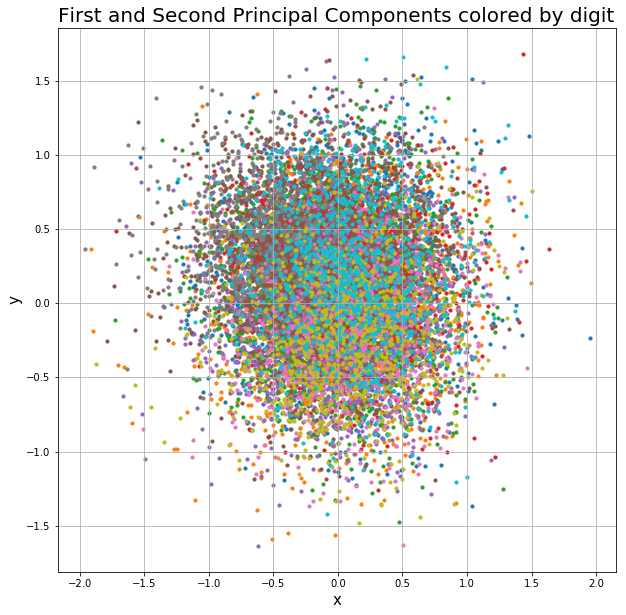

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)
ax.set_title("First and Second Principal Components colored by digit", fontsize = 20)

xf = df['1']
yf = df['2']
for i in range(10):
    ax.scatter(xf[df["clusters"]==i],yf[df["clusters"]==i],s=10)
ax.grid()

PCA

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df.values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
df['pca-three'] = pca_result[:,2]

print( 'Explained variation per principle component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principle component: [0.08342829 0.04037024 0.03435053]


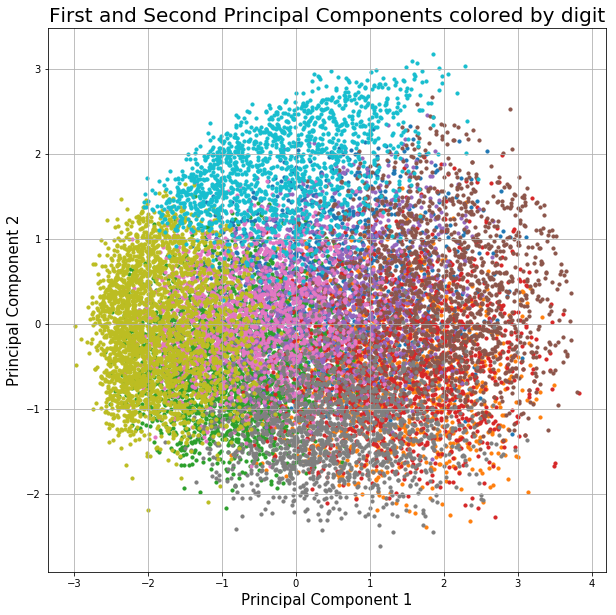

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title("First and Second Principal Components colored by digit", fontsize = 20)

xf = df['pca-one']
yf = df['pca-two']
for i in range(10):
    ax.scatter(xf[df["clusters"]==i],yf[df["clusters"]==i],s=10)
ax.grid()

TSNE

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.values)

In [33]:
df_tsne = df.copy() 
df_tsne['x-tsne'] = tsne_results[:,0] 
df_tsne['y-tsne'] = tsne_results[:,1] 

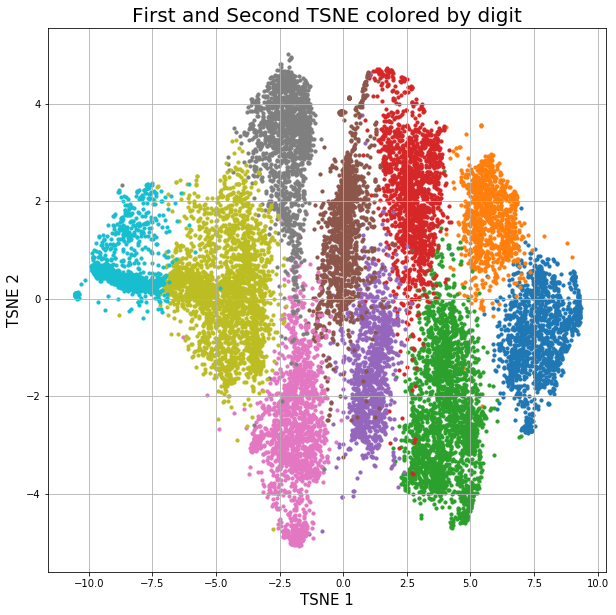

In [34]:
# import matplotlib.pyplot as plt
# %matplotlib inline

fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('TSNE 1', fontsize = 15)
ax.set_ylabel('TSNE 2', fontsize = 15)
ax.set_title("First and Second TSNE colored by digit", fontsize = 20)

xf = df_tsne['x-tsne']
yf = df_tsne['y-tsne']

for i in range(10):
    ax.scatter(xf[df["clusters"]==i],yf[df["clusters"]==i],s=10)
ax.grid()

# Q3. 축소 전 데이터와 PCA축소 데이터 training 시간 비교

Data

In [5]:
data = pd.read_csv("./train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.model_selection import train_test_split

X = data.drop("label", axis=1)
y = data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

원본 데이터 KNN

In [39]:
import time
from sklearn.neighbors import KNeighborsClassifier

time_start = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print( 'KNN done! Time elapsed: {} seconds'.format(time.time() - time_start ))

t-SNE done! Time elapsed: {} seconds 1322.8352539539337


In [40]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.965


원본 데이터 SVM

In [ ]:
from sklearn.svm import SVC

time_start = time.time()
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print( 'SVM done! Time elapsed: {} seconds'.format(time.time() - time_start ))  #너므너므 오래 걸린당... 알 수 없당.. 

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

PCA

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X = data.drop("label", axis=1)
y = data["label"]

pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=4)

축소 후 데이터 KNN

In [12]:
import time
from sklearn.neighbors import KNeighborsClassifier

time_start = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print( 'KNN done! Time elapsed: {} seconds'.format(time.time() - time_start ))

KNN done! Time elapsed: 0.31107211112976074 seconds


In [14]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.47464285714285714


축소 후 데이터 SVM

In [ ]:
from sklearn.svm import SVC

time_start = time.time()
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print( 'SVM done! Time elapsed: {} seconds'.format(time.time() - time_start )) #축소시켰는데도 끝나지 않는당,,

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))